In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image,display
from IPython.core.display import HTML
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score ,silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Books = pd.read_csv('/content/drive/MyDrive/book_system/Books.csv',low_memory=False)
Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
Books.describe()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,118,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,17627,7535,2,2,2


In [12]:
Books['Year-Of-Publication'].describe()


count     271360
unique       118
top         2002
freq       17627
Name: Year-Of-Publication, dtype: object

In [6]:
Users = pd.read_csv('/content/drive/MyDrive/book_system/Users.csv',low_memory=False)
Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
Users.Age.describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

In [14]:
Users = Users[(Users.Age>=15) & (Users.Age<=100)]


In [15]:
print("shape before cleaning:",Ratings.shape)
Ratings = Ratings[Ratings['ISBN'].isin(list(Books['ISBN'].unique()))]
Ratings = Ratings[Ratings['User-ID'].isin(list(Users['User-ID'].unique()))]
print("shape after cleaning:",Ratings.shape)

shape before cleaning: (1149780, 3)
shape after cleaning: (739812, 3)


In [7]:
Ratings = pd.read_csv('/content/drive/MyDrive/book_system/Ratings.csv')
Ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [18]:
df = pd.merge(Ratings,Books,on='ISBN')
df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
1,638,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
2,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
4,8253,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...


In [19]:
df.shape

(739812, 10)

In [20]:
df2= pd.merge(df,Users,on='User-ID')
df2.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16.0
1,638,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"san diego, california, usa",20.0
2,638,0316666343,10,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,"san diego, california, usa",20.0
3,638,0375400699,10,Love in the Time of Cholera (Everyman's Librar...,GABRIEL GARCIA MARQUEZ,1997,Everyman's Library,http://images.amazon.com/images/P/0375400699.0...,http://images.amazon.com/images/P/0375400699.0...,http://images.amazon.com/images/P/0375400699.0...,"san diego, california, usa",20.0
4,638,0385504209,10,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,"san diego, california, usa",20.0


In [21]:
df2.shape

(739812, 12)

In [22]:
df2.describe()

,User-ID,Book-Rating,Age
count,739812.000000,739812.000000,739812.000000
mean,140845.438853,2.767168,37.379802
std,78582.271044,3.863831,11.857421
min,2.000000,0.000000,15.000000
25%,74172.000000,0.000000,29.000000
50%,140863.000000,0.000000,35.000000
75%,208058.000000,7.000000,45.000000
max,278852.000000,10.000000,100.000000


Now creating a crosstab so that each users ends up as a row and the books as columns


In [29]:
mem=df2.memory_usage().sum()/1024**2
print('memeory usage {:.2f} MB'.format(mem))

memeory usage 73.38 MB


In [31]:
df2['Book-Rating']=np.int8(df2['Book-Rating'])

In [32]:
mem=df2.memory_usage().sum()/1024**2
print('memeory usage {:.2f} MB'.format(mem))

memeory usage 68.44 MB


In [35]:
df2['User-ID']=np.int32(df2['User-ID'])

In [36]:
mem=df2.memory_usage().sum()/1024**2
print('memeory usage {:.2f} MB'.format(mem))

memeory usage 65.62 MB


In [37]:
df2['Age']=np.int8(df2['Age'])

In [38]:
mem=df2.memory_usage().sum()/1024**2
print('memeory usage {:.2f} MB'.format(mem))

memeory usage 60.68 MB


In [41]:
df2.shape

(739812, 12)

In [52]:
df6=df2.head(100000)

In [53]:
# Taking the mean of rating given by each user
User_rating_mean = df6.groupby('User-ID')['Book-Rating'].mean()
user_rating = df6.set_index('User-ID')
user_rating['mean_rating'] = User_rating_mean
user_rating.reset_index(inplace=True)
# Keeping the books in which users "likes" the book
user_rating = user_rating[user_rating['Book-Rating'] > user_rating['mean_rating']]
# Initializing a dummy variable for future use
user_rating['is_fav'] = 1
print(user_rating.shape)
user_rating.head()
#Now creating a crosstab so that each users ends up as a row and the books as columns
df5 = pd.pivot_table(user_rating,index='User-ID',columns='ISBN',values='is_fav')
df5.fillna(value=0,inplace=True)
df5.head(10)

(19204, 14)


ISBN,000104799X,0001821326,0002165368,0002239183,0002240114,0002550563,0004125576,0004356373,0004723708,0006157629,...,9813056606,9838523283,9990371628,9994256963,9997508769,B00005TZWI,B00005UMK6,B00007FYKW,B00009NDAN,B0000VZEJQ
User-ID,,,,,,,,,,,,,,,,,,,,,
638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
pca = PCA(n_components=3)
pca.fit(df5)
pca_fit = pca.transform(df5)
pca_fit = pd.DataFrame(pca_fit,index=df5.index)

Finding the Right k

We will use the below method to find the right k(no. of clusters). For that, we will make a line graph of k vs the Total sum of squared errors from the respective centres, and the point at we see an below forming is chosen as the optimal value of k.

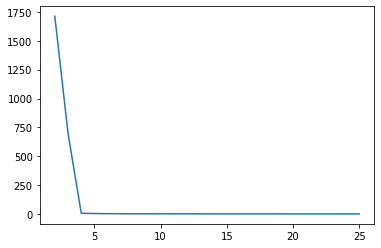

In [55]:
TSS = []
for i in range(2,26):
    km = KMeans(n_clusters=i,random_state=0)
    km.fit(pca_fit)
    TSS.append(km.inertia_)
plt.plot(range(2,26),TSS,'-')

In [56]:
for n in [2,3,4,5,6,7,8]:
    km = KMeans(n_clusters=n,random_state=0)
    clusters = km.fit_predict(pca_fit)
    silhouette_avg = silhouette_score(pca_fit, clusters)
    print("For n_clusters =", n,
          "The average silhouette_score is :", silhouette_avg)
    silhouette_values = silhouette_samples(pca_fit, clusters)

For n_clusters = 2 The average silhouette_score is : 0.9843450775632493
For n_clusters = 3 The average silhouette_score is : 0.9833309897607314
For n_clusters = 4 The average silhouette_score is : 0.9841086853174454
For n_clusters = 5 The average silhouette_score is : 0.758583918125305
For n_clusters = 6 The average silhouette_score is : 0.7625774811889525
For n_clusters = 7 The average silhouette_score is : 0.6324863502897197
For n_clusters = 8 The average silhouette_score is : 0.48806156081046415


In [58]:
from pandas.core.groupby import DataFrameGroupBy
Kmeans_final = KMeans(n_clusters=3,random_state=0).fit(pca_fit)
df5['cluster'] = Kmeans_final.labels_


In [62]:
# Gettings the books for each cluster
cl1_books = df5[df5.cluster == 0].mean()
cl2_books = df5[df5.cluster == 1].mean()
cl3_books = df5[df5.cluster == 2].mean()
cl4_books = df5[df5.cluster == 3].mean()
# Getting the users for each cluster
cl1_users = df5[df5.cluster == 0].index
cl2_users = df5[df5.cluster == 1].index
cl3_users = df5[df5.cluster == 2].index
cl4_users = df5[df5.cluster == 3].index

In [64]:
def cluster_user_des(Ser):
    cl_user = Users[Users['User-ID'].isin(list(Ser))]
    print('Most Common Location:',cl_user['Location'].mode()[0])
    print('\nMean Age:',cl_user['Age'].mean())
cluster_user_des(cl1_users)

Most Common Location: toronto, ontario, canada

Mean Age: 36.60727272727273


In [65]:
def cluster_books_des(Ser):
    bks = pd.DataFrame(Ser).merge(Books,left_index=True,right_on='ISBN',how='left')
    bks.rename(columns={0:'avg_score'},inplace=True)
    bks.sort_values(by='avg_score',ascending=False,inplace=True)
    print('Median Year:',int(bks['Year-Of-Publication'].median()))
    print('\nTop 5 Books\n')
    Top5_books = bks.index[:5]
    for i,isbn in enumerate(Top5_books):
        print(str(i+1)+'.',bks.loc[isbn]['Book-Title'])
    Top5_authors = bks['Book-Author'].unique()[:5]
    print('Top 5 Authors\n')
    for i,auth in enumerate(Top5_authors):
        print(str(i+1)+'.',auth)
cluster_books_des(cl1_books)

Median Year: 1996

Top 5 Books

1. The Lovely Bones: A Novel
2. The Notebook
3. Where the Heart Is (Oprah's Book Club (Paperback))
4. Little Altars Everywhere
5. The Da Vinci Code
Top 5 Authors

1. Alice Sebold
2. Nicholas Sparks
3. Billie Letts
4. Rebecca Wells
5. Dan Brown
